# Entregável 1 - visão computacional

In [1]:
%matplotlib inline
import cv2

from matplotlib import pyplot as plt
import numpy as np
import time as t
print ("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 3.3.1 


# Equalização de histograma

In [15]:
rintin = cv2.imread("RinTinTin.jpg")

In [16]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

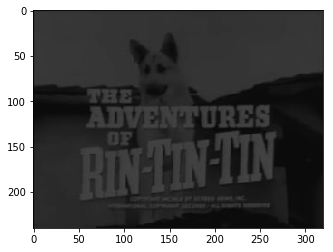

In [17]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

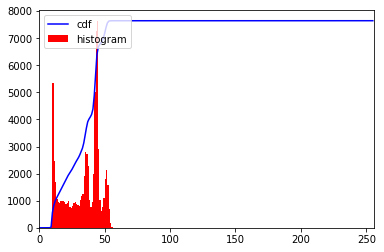

In [18]:
hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Equalize o histograma de maneira que a cumulativa seja uma função linear na diagonal do gráfico
3. Plote a imagem desenhada

In [8]:
hist

array([   0,    0,    0,    0,    0,    0,    0,    0,   29,  283, 5342,
       2465, 1674, 1079,  945,  901,  973,  972, 1000,  946,  879,  917,
        988,  778,  731,  799,  933,  960,  867,  832,  816, 1023, 1172,
       1265, 1921, 2799, 2732, 2293, 1033,  784,  941, 1978, 5026, 7264,
       7645, 2897, 1008,  604,  768, 1117, 1817, 2124, 1595,  688,  159,
         36,    0,    1,    1,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

R .: O histograma não aproveita bem as faixas de cores porque não tem um range (0,255).

In [21]:
m = rintin_gray.min()
rgnew = rintin_gray - m
rgnew = rgnew/float(rgnew.max())
rgnew = rgnew*255

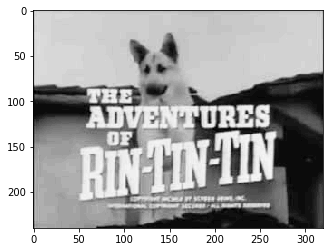

In [23]:
plt.imshow(rgnew, cmap="Greys_r")

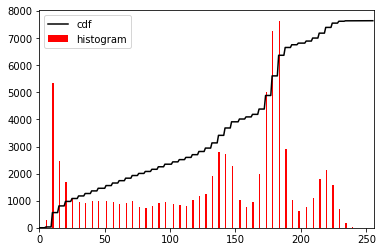

In [25]:
hist,bins = np.histogram(rgnew.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'k')
plt.hist(rgnew.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](hall_box_battery1.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e a bateria azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui


In [9]:
rb = cv2.imread("hall_box_battery1.jpg")

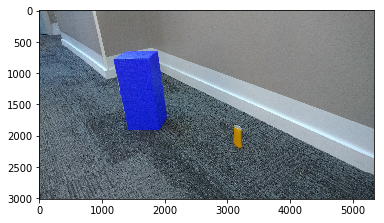

In [26]:
plt.imshow(rb)

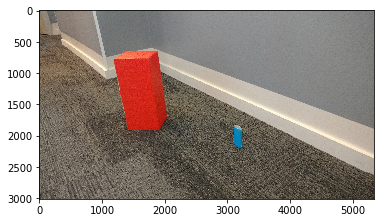

In [27]:
rgb = cv2.cvtColor(rb, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

In [12]:
rbr = rgb[:,:,0]
rbb = rgb[:,:,2]

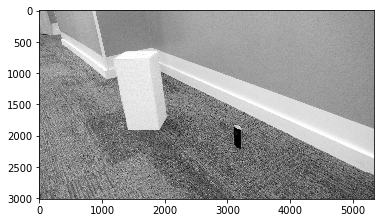

In [14]:
plt.imshow(rbr, cmap='Greys_r')

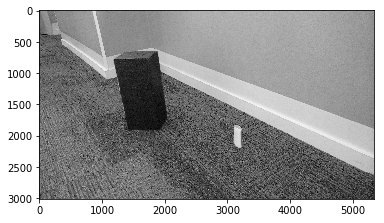

In [15]:
plt.imshow(rbb, cmap='Greys_r')

R.: Sim, é possível. Ao separar o canal R fica claro que a cor vermelha se torna branca, e o mesmo acontece ao separar o canal B

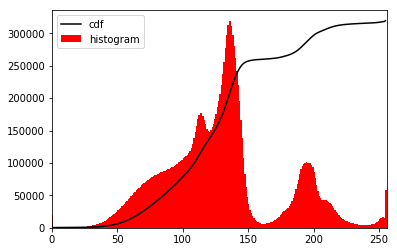

In [16]:
hist,bins = np.histogram(rbr.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'k')
plt.hist(rbr.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

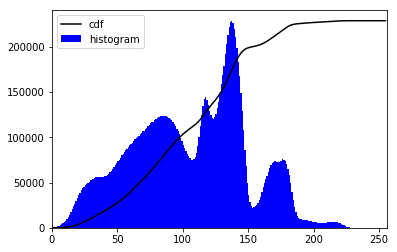

In [17]:
hist,bins = np.histogram(rbb.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'k')
plt.hist(rbb.flatten(),256,[0,256], color = 'b')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [ ]:
'''red = np.uint8([[[255,0,0]]])
hsv_red = cv2.cvtColor(red,cv2.COLOR_RGB2HSV)
print hsv_red'''

In [61]:
lower_range = np.array([0,110,0], dtype=np.uint8)
upper_range = np.array([10,255,255], dtype=np.uint8)

In [62]:
rgb_hsv = cv2.cvtColor(rgb, cv2.COLOR_RGB2HSV)

In [63]:
mask = cv2.inRange(rgb_hsv, lower_range, upper_range)

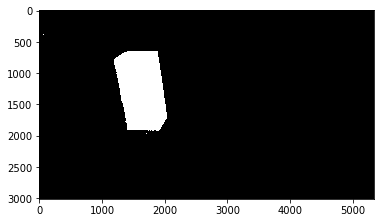

In [64]:
plt.imshow(mask, cmap="Greys_r")